In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/WHR-2024-5CS037.csv'

In [ ]:
#3.1
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')

In [ ]:
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
#Identifying numbers of rows and columns
num_rows=df.shape[0]
num_cols=df.shape[1]
print(f"Number of rows: {num_rows} ")
print(f"Number of columns: {num_cols}")

Number of rows: 143 
Number of columns: 9


In [ ]:
#List of all columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [ ]:
#Calculation of mean, median, and standard deviation for 'score' column

mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"Mean score: {mean_score}")
print(f"Median score: {median_score}")
print(f"Standard deviation of score: {std_dev_score}")

Mean score: 5.52758041958042
Median score: 5.785
Standard deviation of score: 1.1707165099442995


In [ ]:
#Highest and lowest score of each country
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Country with highest score: {highest_score_country}")
print(f"Country with lowest score: {lowest_score_country}")

Country with highest score: Finland
Country with lowest score: Afghanistan


In [ ]:
#Missing values in the dataset.
missing_values = df.isna().sum()

missing_values_count = missing_values[missing_values > 0]

if missing_values_count.empty:
    print("No missing values found.")
else:
    print("Missing values count:")
    print(missing_values_count)

print(missing_values)

Missing values count:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#Filtering the dataset that shows the score only greater than 7.5
filtered_df = df[df['score'] > 7.5]
print(filtered_df)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
# Filtering datasets, sort by GDP per Capita in descending order
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_df.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
# Adding new Column 'Happiness'
def categorize_happiness(score):
    if score >= 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

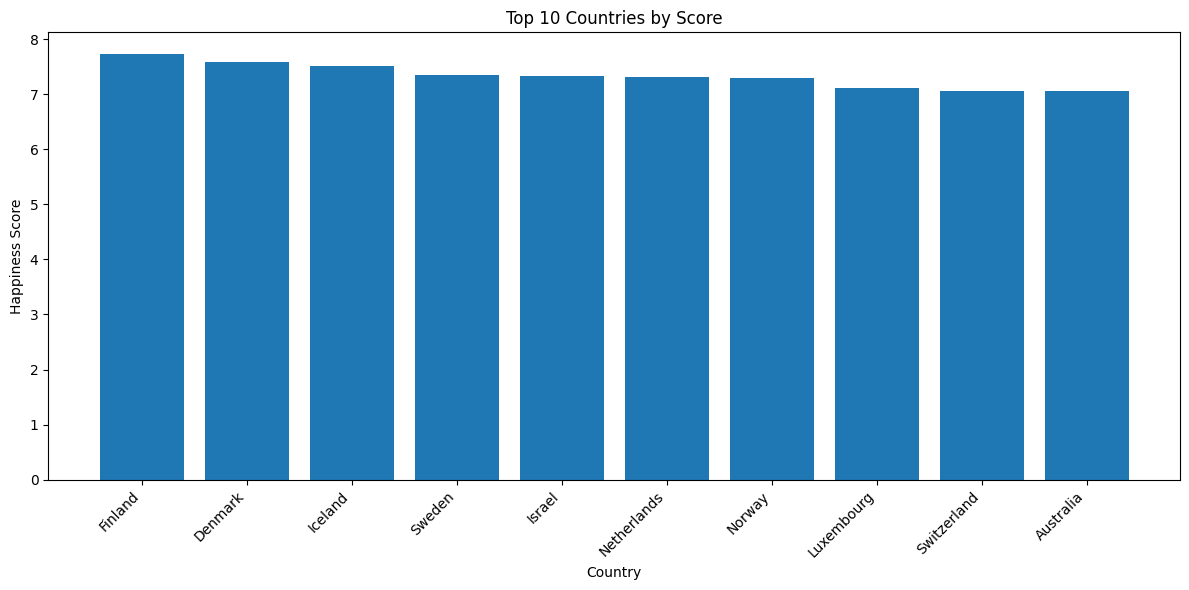

In [ ]:
# Data Visualizations
# Bar Plot

import matplotlib.pyplot as plt

top_10_countries = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country name'], top_10_countries['score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Countries by Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

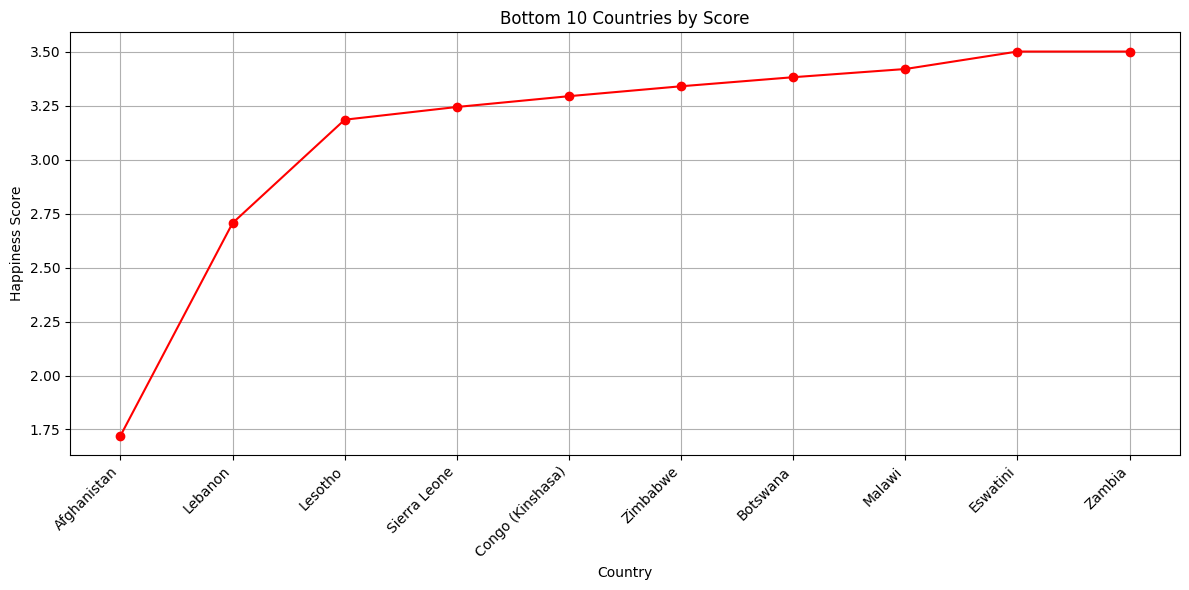

In [ ]:
#Line Plot for the unhappiest countries
bottom_10 = df.sort_values('score', ascending=True).head(10)
plt.figure(figsize=(12, 6))
plt.plot(bottom_10['Country name'], bottom_10['score'], marker ='o', linestyle='-', color='red', label='Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Bottom 10 Countries by Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

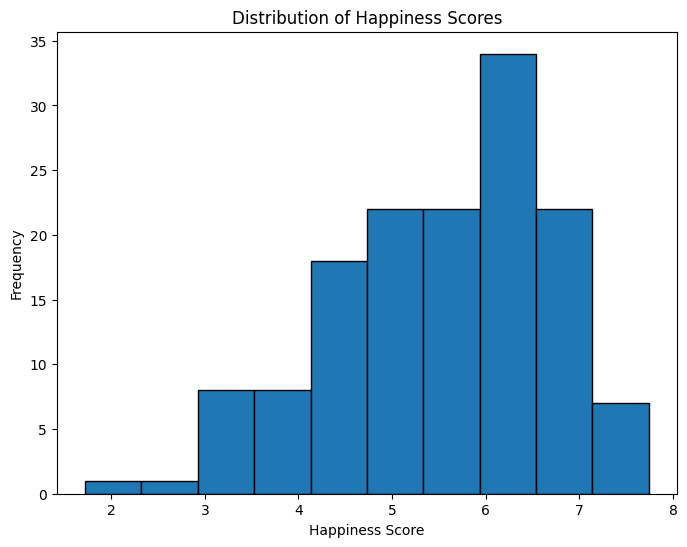

In [ ]:
#Histogram plotting to show distribution.

plt.figure(figsize = (8, 6))
plt.hist(df['score'], bins = 10, edgecolor = 'black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

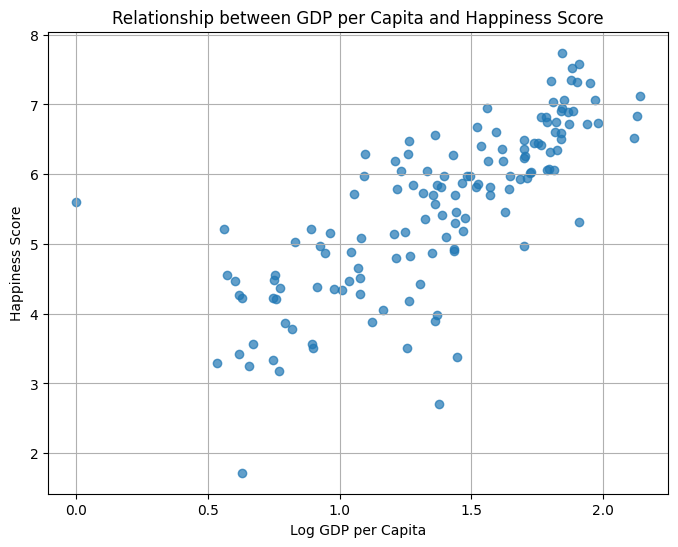

In [ ]:
#Scanner plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['Log GDP per capita'], df['score'],alpha=0.7)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.grid(True)
plt.show()

In [ ]:
#3.2
# Task 1 ->Setup Task
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]

south_asia_df.to_csv('south_asia_data.csv', index=False)

print(south_asia_df)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783                Low  
107                      0.074

    Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


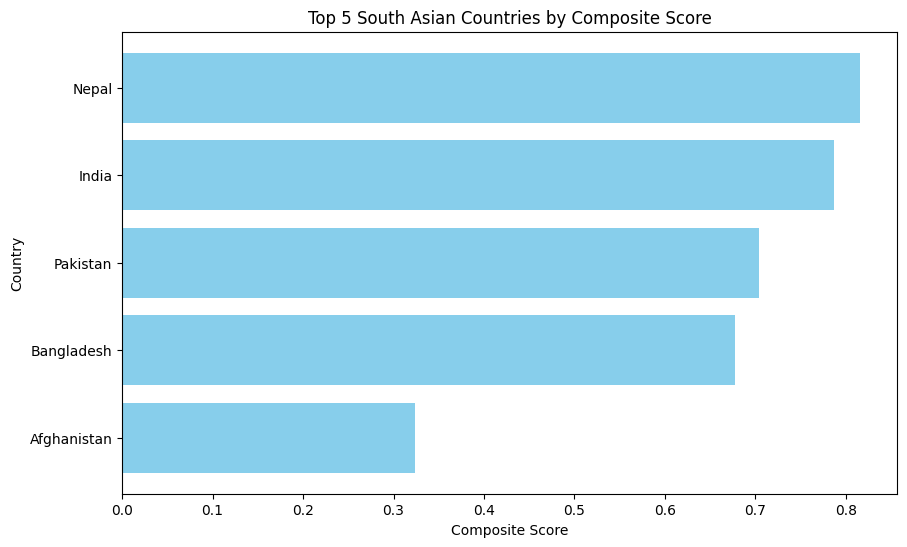

In [ ]:
# Calculating 'Composite Score' with corrected column name
south_asia_df = south_asia_df.copy()  # Create a copy to avoid SettingWithCopyWarning
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

#Ranking the countries by Composite Score
ranked_south_asia_df = south_asia_df.sort_values(['Composite Score'], ascending=False)

# Display the Composite Score rankings
print(ranked_south_asia_df[['Country name', 'Composite Score']])

# Select the top 5 countries
top_5_countries = ranked_south_asia_df.head(5)

# Plot the top 5 countries by Composite Score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


The above graph shows Top 5 South Asian Countries by composite Scores. In the graph, to check if the rankings are aligned with original score, we need both datasets and visualize the comparisons to highlight correlations.

In [ ]:
#Task 3

# Calculate quantiles and IQR for 'Score' and 'Log GDP per capita'
Q1_score = south_asia_df['score'].quantile(0.25)
Q3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define upper and lower bounds for outliers
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_score = Q1_score - 1.5 * IQR_score

upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp

# Identify outliers
outliers_score = south_asia_df[(south_asia_df['score'] < lower_bound_score) | (south_asia_df['score'] > upper_bound_score)]
outliers_gdp = south_asia_df[(south_asia_df['Log GDP per capita'] < lower_bound_gdp) | (south_asia_df['Log GDP per capita'] > upper_bound_gdp)]

# Combine outliers from both columns
outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

print("Outlier Countries:")
print(outliers)

Outlier Countries:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672               High   

     Composite Score  
142           0.3238  


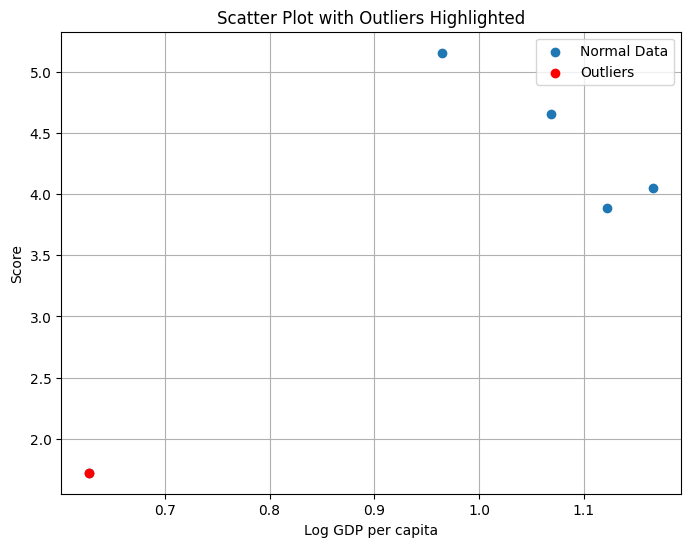

In [ ]:
#3.4 Scatter plot with the outliers highlighted
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal Data')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

In the above Scatter plot, the outliners are notable for their significance in lower scores comparibility to the majority of data points. So they dont align with regional averages, the data is skewed and increase in data's variability. So understanding the reasons and causes of outliers is important for making well informed decisions.

In [ ]:
#Task 4.1
#Calculation of Correlation
correlation_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'], method='pearson')
correlation_generosity = south_asia_df['score'].corr(south_asia_df['Generosity'], method='pearson')

print(f"Correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")
print(f"Correlation between Score and Generosity: {correlation_generosity}")


Correlation between Score and Freedom to Make Life Choices: 0.801497903141921
Correlation between Score and Generosity: 0.8773326267276358


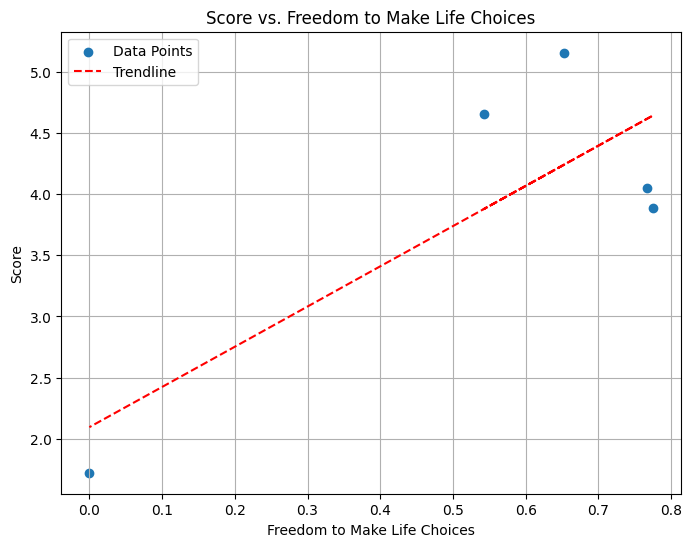

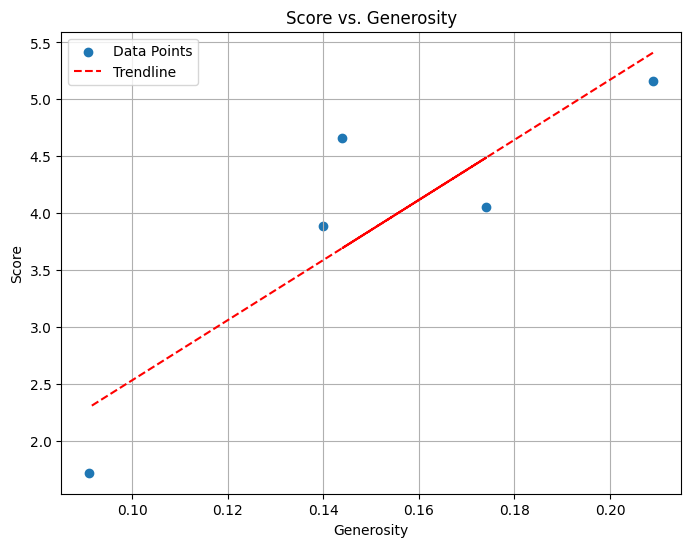

In [ ]:
#Task 4.2
#Scatter plot for Freedom to Make Life Choices
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'], label='Data Points')

# Add trendline
z = np.polyfit(south_asia_df['Freedom to make life choices'], south_asia_df['score'], 1)
p = np.poly1d(z)
plt.plot(south_asia_df['Freedom to make life choices'], p(south_asia_df['Freedom to make life choices']), "r--", label='Trendline')

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Score vs Freedom to Make Life Choices')
plt.legend()  # Add legend to distinguish data points and the trendline
plt.grid(True)
plt.show()

# Scatter plot for generosity
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Generosity'], south_asia_df['score'], label='Data Points')

# Add trendline
z = np.polyfit(south_asia_df['Generosity'], south_asia_df['score'], 1)
p = np.poly1d(z)
plt.plot(south_asia_df['Generosity'], p(south_asia_df['Generosity']), "r--", label='Trendline')

plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Score vs. Generosity')
plt.legend()  # Add legend to distinguish data points and trendline
plt.grid(True)
plt.show()

In [ ]:
#Identifying the strongest and weakest relationships with metrics and score of South Asian countries
correlation_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'], method='pearson')
correlation_generosity = south_asia_df['score'].corr(south_asia_df['Generosity'])
correlation_gdp = south_asia_df['score'].corr(south_asia_df['Log GDP per capita'])
correlation_social_support = south_asia_df['score'].corr(south_asia_df['Social support'])
correlation_life_expectancy = south_asia_df['score'].corr(south_asia_df['Healthy life expectancy'])

print(f"Correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")

Correlation between Score and Freedom to Make Life Choices: 0.801497903141921


For south asia countries, the metrics strongly is linked to the happiness score with the highest correlation, there is a huge role played by social factors and economic stability. But opposite to it, metrics like generosity, which shows a weaker correlation has overall less impact on overall happiness.

This analysis highlights the importance of these factors in sharing happiness in the region.

In [ ]:
#Task 5 Gap Analysis

#Adding new Column GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

#Display the updated DataFrame
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115                1.783                Low   
107                      0.0

In [ ]:
#Ascending order
ascending_ranked_df = south_asia_df.sort_values(['GDP-Score Gap'])
print("Ranks in Ascending Order: ")
print(ascending_ranked_df[['Country name', 'GDP-Score Gap']])

#Descending order
descending_ranked_df = south_asia_df.sort_values(by=['GDP-Score Gap'], ascending=False)
print("\n Ranks in Descending Order: ")
print(descending_ranked_df[['Country name', 'GDP-Score Gap']])

Ranks in Ascending Order: 
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093

 Ranks in Descending Order: 
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


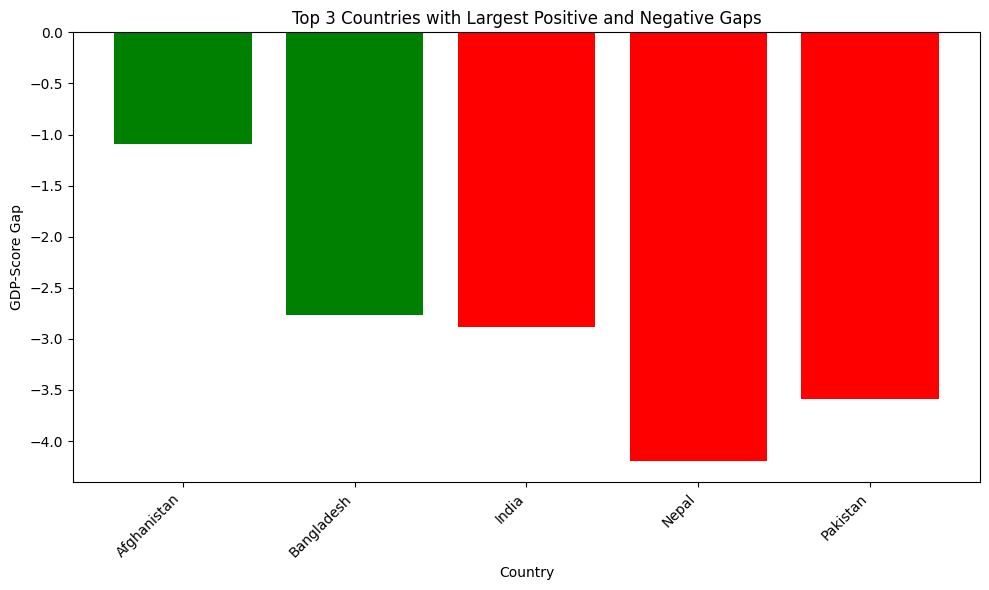

In [ ]:
#Highlighting top 3 countries with largest positive and negative gaps

#GDP score Gap in descending order to get positive gaps
top_positive_gaps = south_asia_df.sort_values(['GDP-Score Gap'], ascending=False).head(3)
#GDP Score GAP in ascending order
top_negative_gaps = south_asia_df.sort_values(['GDP-Score Gap']).head(3)
#Combination of two dataframes
top_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_gaps['Country name'], top_gaps['GDP-Score Gap'], color=['green', 'green', 'green', 'red', 'red', 'red'])
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive and Negative Gaps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph demonstrates how South Asian countries' social development and economic growth(GDP) contrast with one another. Positive gaps show countries with larger GDPs, whereas negative gaps suggest nations with lower GDPs but higher levels of social development. It might be the outcome of sustainable practices or strong social indicators.

In [ ]:
#Problem 3
#Comparitative Analysis
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]

print(middle_east_df)

middle_east_df.to_csv('middle_east_data.csv', index=False)

             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

In [ ]:
#Descriptive Statistics

#Mean and Standard Deviation of South Asia
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

#Mean and Standard Deviation of Middle East
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Score:  {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

#Comparison of mean scores
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher mean score.")
elif south_asia_mean < middle_east_mean:
    print("Middle East has a higher mean score.")
else:
    print("Both regions have the same average happiness score.")



South Asia - Mean Score:  3.90, Standard Deviation: 1.32
Middle East - Mean Score: 5.41, Standard Deviation: 1.57
Middle East has a higher mean score.


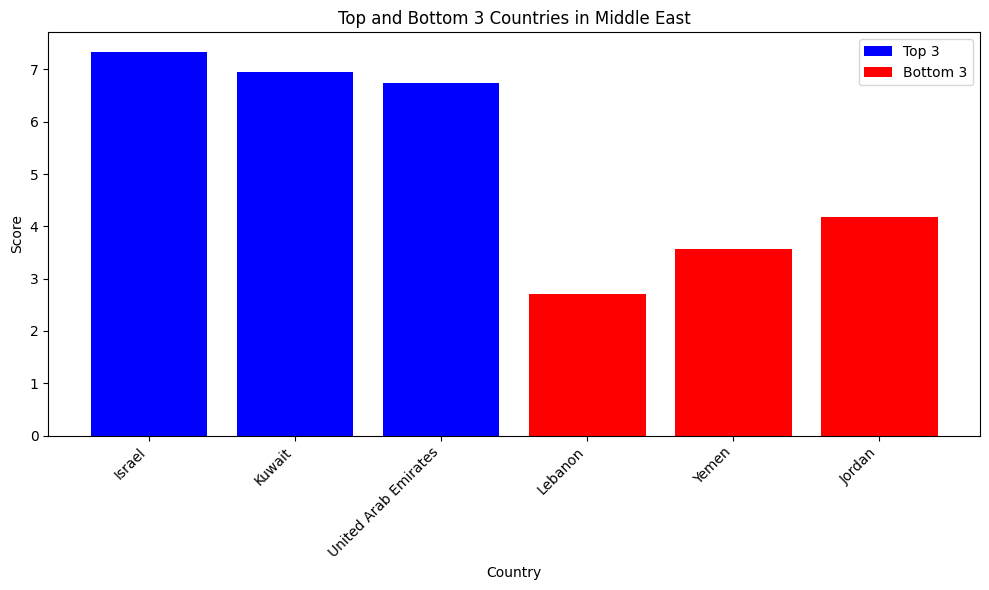

In [ ]:
#Top and Bottom Performers

#Middle East
middle_east_top3 = middle_east_df.sort_values(by=['score'], ascending = False).head(3)
middle_east_bottom3 = middle_east_df.sort_values(by=['score']).head(3)

#South Asia
south_asia_top3 = south_asia_df.sort_values(by=['score'], ascending = False).head(3)
south_asia_bottom3 = south_asia_df.sort_values(by=['score']).head(3)

#Bar Graph for Middle East
plt.figure(figsize=(10, 6))
plt.bar(middle_east_top3['Country name'], middle_east_top3['score'], color='blue', label='Top 3')
plt.bar(middle_east_bottom3['Country name'], middle_east_bottom3['score'], color='red', label='Bottom 3')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top and Bottom 3 Countries in Middle East')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

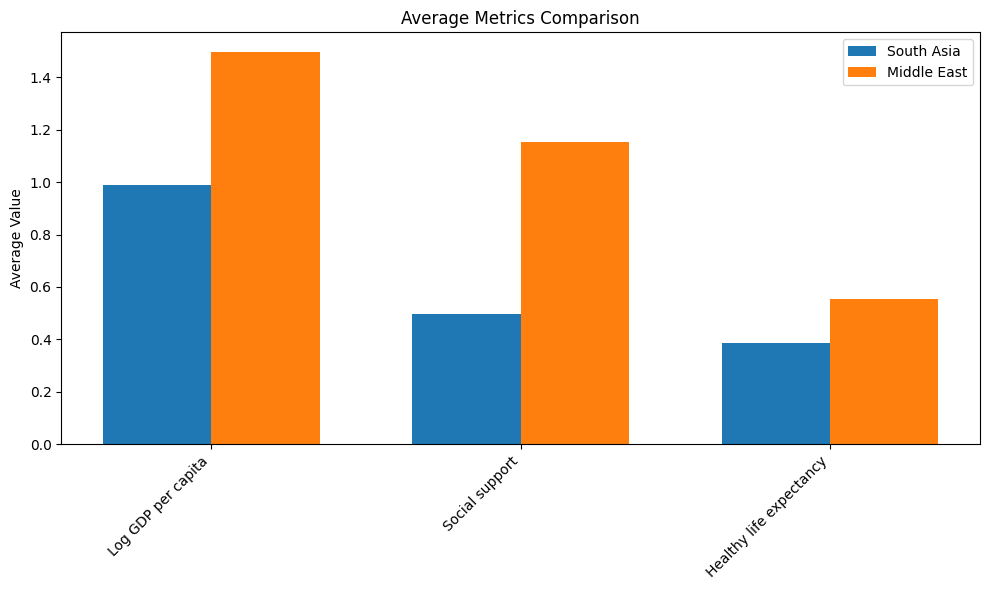

The metric with the largest disparity between the two regions is: Social support


In [ ]:
#Metric Comparisons

#Calculation of average metrics for South Asia
south_asia_metrics = south_asia_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

#Calculation of average metrics for Middle East
middle_east_metrics = middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

#Metrics Comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

#Average Values for each region
south_asia_values = south_asia_metrics.values
middle_east_values = middle_east_metrics.values

x = np.arange(len(metrics))
width = 0.35

#Bar Graph for South Asia
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, south_asia_values, width, label='South Asia')
rects2 = ax.bar(x + width/2, middle_east_values, width, label='Middle East')

# Labels and Titles
ax.set_ylabel('Average Value')
ax.set_title('Average Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the absolute difference between the average values for each metric
disparity = np.abs(south_asia_values - middle_east_values)

# Find the metric with the largest disparity
largest_disparity_metric = metrics[np.argmax(disparity)]

print(f"The metric with the largest disparity between the two regions is: {largest_disparity_metric}")

In [ ]:
# Happiness Disparity

# Range for South Asia
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()

# Range for Middle East
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

print(f"Range for South Asia: {south_asia_range}")
print(f"Range for Middle East: {middle_east_range}")

# CV for South Aisa
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()

# CV for Middle East
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Coefficient of Variation: {south_asia_cv:.2f}")
print(f"Middle East - Coefficient of Variation: {middle_east_cv:.2f}")

if south_asia_cv > middle_east_cv:
    print("South Asia has a higher coefficient of variation.")
elif south_asia_cv < middle_east_cv:
    print("Middle East has a higher coefficient of variation.")
else:
  print("Both regions have simple variability in happiness.")

Range for South Asia: 3.4370000000000003
Range for Middle East: 4.634
South Asia - Coefficient of Variation: 0.34
Middle East - Coefficient of Variation: 0.29
South Asia has a higher coefficient of variation.


In [ ]:
#Correlation Analysis

# South Asia
south_asia_corr_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
south_asia_corr_generosity = south_asia_df['score'].corr(south_asia_df['Generosity'])

# Middle East
middle_east_corr_freedom = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_corr_generosity = middle_east_df['score'].corr(middle_east_df['Generosity'])

print("South Asia: ")
print(f"Correlation between Score and Freedom to Make Life Choices: {south_asia_corr_freedom:.2f}")
print(f"Correlation between Score and Generosity: {south_asia_corr_generosity:.2f}")

print("\nMiddle East: ")
print(f"Correlation between Score and Freedom to Make Life Choices: {middle_east_corr_freedom:.2f}")
print(f"Correlation between Score and Generosity: {middle_east_corr_generosity:.2f}")

South Asia: 
Correlation between Score and Freedom to Make Life Choices: 0.80
Correlation between Score and Generosity: 0.88

Middle East: 
Correlation between Score and Freedom to Make Life Choices: 0.86
Correlation between Score and Generosity: 0.63


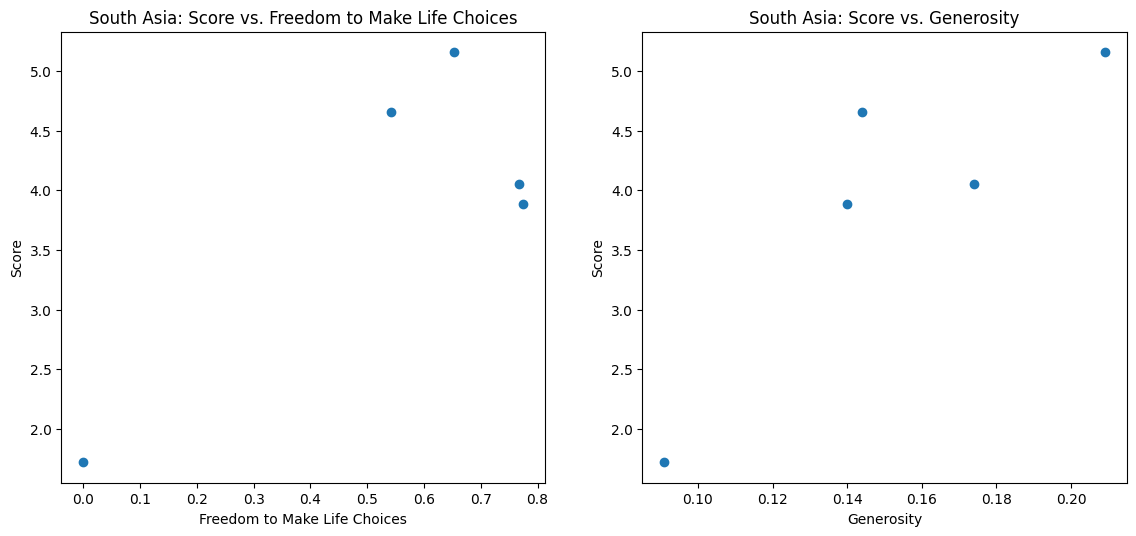

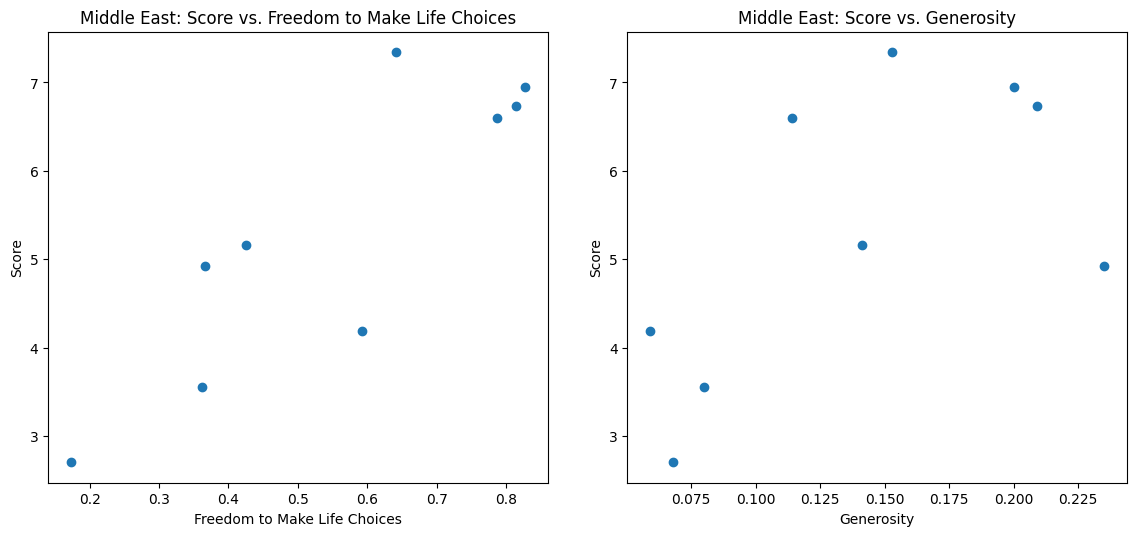

In [47]:
#Scatter plots for South Asia
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('South Asia: Score vs. Freedom to Make Life Choices')

plt.subplot(1, 2, 2)
plt.scatter(south_asia_df['Generosity'], south_asia_df['score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('South Asia: Score vs. Generosity')

plt.tight_layout(pad=3.0)
plt.show()

# Scatter plots for Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(middle_east_df['Freedom to make life choices'], middle_east_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Middle East: Score vs. Freedom to Make Life Choices')

plt.subplot(1, 2, 2)
plt.scatter(middle_east_df['Generosity'], middle_east_df['score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Middle East: Score vs. Generosity')

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
#Outlier Detection

#South Asia
# Calculate quartiles and IQR
Q1_score_sa = south_asia_df['score'].quantile(0.25)
Q3_score_sa = south_asia_df['score'].quantile(0.75)
IQR_score_sa = Q3_score_sa - Q1_score_sa

Q1_gdp_sa = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp_sa = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp_sa = Q3_gdp_sa - Q1_gdp_sa

# Define outlier bounds
upper_bound_score_sa = Q3_score_sa + 1.5 * IQR_score_sa
lower_bound_score_sa = Q1_score_sa - 1.5 * IQR_score_sa
upper_bound_gdp_sa = Q3_gdp_sa + 1.5 * IQR_gdp_sa
lower_bound_gdp_sa = Q1_gdp_sa - 1.5 * IQR_gdp_sa

#Identify outliers
outliers_score_sa = south_asia_df[(south_asia_df['score'] < lower_bound_score_sa) | (south_asia_df['score'] > upper_bound_score_sa)]
outliers_gdp_sa = south_asia_df[(south_asia_df['Log GDP per capita'] < lower_bound_gdp_sa) | (south_asia_df['Log GDP per capita'] > upper_bound_gdp_sa)]
outliers_sa = pd.concat([outliers_score_sa, outliers_gdp_sa]).drop_duplicates()

#Middle East
#Calculate quartiles and IQR
Q1_score_me = middle_east_df['score'].quantile(0.25)
Q3_score_me = middle_east_df['score'].quantile(0.75)
IQR_score_me = Q3_score_sa - Q1_score_sa

Q1_gdp_me = middle_east_df['Log GDP per capita'].quantile(0.25)
Q3_gdp_me = middle_east_df['Log GDP per capita'].quantile(0.75)
IQR_gdp_me = Q3_gdp_me - Q1_gdp_me

#Define outlier bounds
upper_bound_score_me = Q3_score_sa + 1.5 * IQR_score_me
lower_bound_score_me = Q1_score_sa - 1.5 * IQR_score_me
upper_bound_gdp_me = Q3_gdp_sa + 1.5 * IQR_gdp_me
lower_bound_gdp_me = Q1_gdp_sa - 1.5 * IQR_gdp_me

# Identify outliers
outliers_score_me = middle_east_df[(middle_east_df['score'] < lower_bound_score_me) | (middle_east_df['score'] > upper_bound_score_sa)]
outliers_gdp_me = middle_east_df[(middle_east_df['Log GDP per capita'] < lower_bound_gdp_me) | (middle_east_df['Log GDP per capita'] > upper_bound_gdp_sa)]
outliers_me = pd.concat([outliers_score_me, outliers_gdp_me]).drop_duplicates()


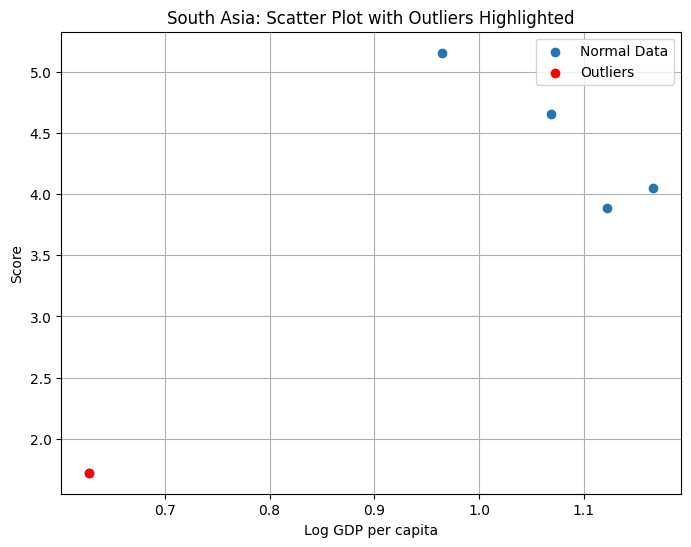

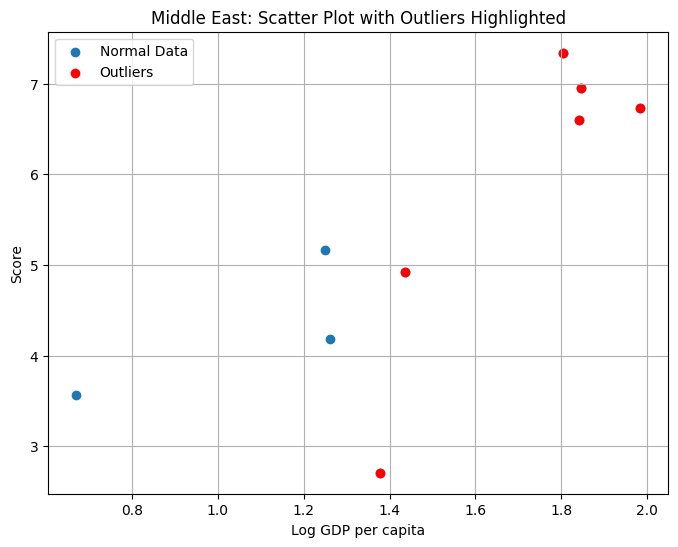

In [ ]:
#Outliers Plotting For South Asia
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal Data')
plt.scatter(outliers_sa['Log GDP per capita'], outliers_sa['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('South Asia: Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], label='Normal Data')
plt.scatter(outliers_me['Log GDP per capita'], outliers_me['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Middle East: Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

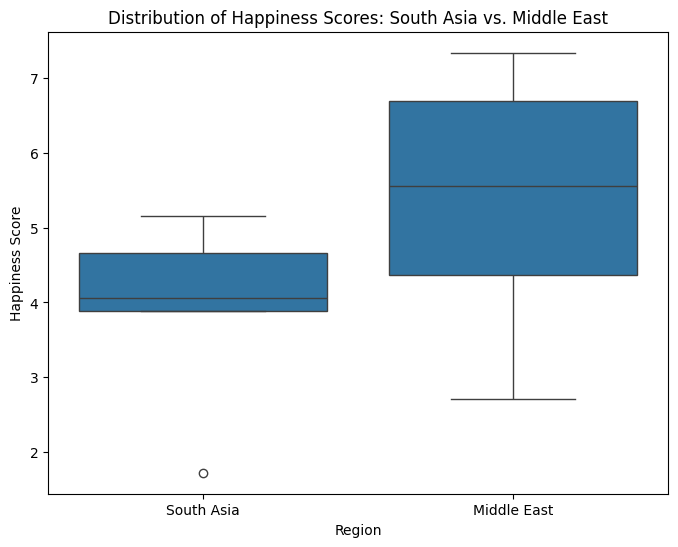

In [48]:
#Visualization

import seaborn as sns  #Import seaborn

#Combining data for both regions
all_data = pd.concat([south_asia_df, middle_east_df], keys=['South Asia', 'Middle East'])
all_data.reset_index(level=0, inplace=True)

#Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='level_0', y='score', data=all_data)
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East')
plt.show()